# REGRESIÓN LOGISTICA PARA ECOMMERCE CUSTOMER CHURN
## FUENTE : [KAGGLE](https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data)

In [109]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.compose
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [9]:
path = kagglehub.dataset_download("upam22/ecommerce-customer-churn-data")
file = '/ecom_data.csv'

path_file = path + file

print("Path to dataset files:", path_file)

df_data = pd.read_csv(path_file)
df_data.head(5)

Path to dataset files: /root/.cache/kagglehub/datasets/upam22/ecommerce-customer-churn-data/versions/1/ecom_data.csv


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [14]:
import re

# Función para convertir nombres de columnas a snake_case
def to_snake_case(name):
    name = re.sub(r'([A-Z]+)([A-Z][a-z])', r'\1_\2', name)  # Separar mayúsculas juntas
    name = re.sub(r'([a-z\d])([A-Z])', r'\1_\2', name)  # Separar camelCase
    name = name.replace(" ", "_")  # Reemplazar espacios por guiones bajos
    return name.lower()

df_data.columns = [to_snake_case(col) for col in df_data]
df_data.head(5)

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# EDA

In [17]:
df_data.shape

(5630, 20)

In [22]:
df_data.dtypes

,0
customer_id,int64
churn,int64
tenure,float64
preferred_login_device,object
city_tier,int64
warehouse_to_home,float64
preferred_payment_mode,object
gender,object
hour_spend_on_app,float64
number_of_device_registered,int64


In [15]:
df_data.dtypes.value_counts()

,count
int64,8
float64,7
object,5


In [16]:
df_data.isna().sum().sum()

1856

In [20]:
df_data.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

,0
day_since_last_order,307
order_amount_hike_fromlast_year,265
tenure,264
order_count,258
coupon_used,256
hour_spend_on_app,255
warehouse_to_home,251


# IMPUTACIÓN POR MEDIDAS DE TENDENCIA CENTRAL(MEDIA)


imputar el campo day_since_last_order

In [29]:
df_data['day_since_last_order'].mean()
df_day_since_last_order = df_data.copy()
df_day_since_last_order['day_since_last_order'] = df_day_since_last_order['day_since_last_order'].fillna(df_day_since_last_order['day_since_last_order'].mean())
df_day_since_last_order = df_day_since_last_order.sort_values(
    by=['day_since_last_order'],
    ascending=False
)

In [30]:
df_data['order_amount_hike_fromlast_year'].mean()
df_order_amount_hike_fromlast_year = df_day_since_last_order.copy()
df_order_amount_hike_fromlast_year['order_amount_hike_fromlast_year'] = df_order_amount_hike_fromlast_year['order_amount_hike_fromlast_year'].fillna(df_order_amount_hike_fromlast_year['order_amount_hike_fromlast_year'].mean())
df_order_amount_hike_fromlast_year = df_order_amount_hike_fromlast_year.sort_values(
    by=['order_amount_hike_fromlast_year'],
    ascending=False
)

In [33]:
df_data['tenure'].mean()
df_tenure = df_order_amount_hike_fromlast_year.copy()
df_tenure['tenure'] = df_tenure['tenure'].fillna(df_tenure['tenure'].mean())
df_tenure = df_tenure.sort_values(
    by=['tenure'],
    ascending=False
)

In [36]:
df_data['order_count'].mean()
df_order_count = df_tenure.copy()
df_order_count['order_count'] = df_order_count['order_count'].fillna(df_order_count['order_count'].mean())
df_order_count = df_order_count.sort_values(
    by=['order_count'],
    ascending=False
)

In [38]:
df_data['coupon_used'].mean()
df_coupon_used = df_order_count.copy()
df_coupon_used['coupon_used'] = df_coupon_used['coupon_used'].fillna(df_coupon_used['coupon_used'].mean())
df_coupon_used = df_coupon_used.sort_values(
    by=['coupon_used'],
    ascending=False
)

In [40]:
df_data['hour_spend_on_app'].mean()
df_hour_spend_on_app = df_coupon_used.copy()
df_hour_spend_on_app['hour_spend_on_app'] = df_hour_spend_on_app['hour_spend_on_app'].fillna(df_hour_spend_on_app['hour_spend_on_app'].mean())
df_hour_spend_on_app = df_hour_spend_on_app.sort_values(
    by=['hour_spend_on_app'],
    ascending=False
)

In [42]:
df_data['warehouse_to_home'].mean()
df_warehouse_to_home = df_hour_spend_on_app.copy()
df_warehouse_to_home['warehouse_to_home'] = df_warehouse_to_home['warehouse_to_home'].fillna(df_warehouse_to_home['warehouse_to_home'].mean())
df_warehouse_to_home = df_warehouse_to_home.sort_values(
    by=['warehouse_to_home'],
    ascending=False
)

confirmamos que no tengamos nulos

In [55]:
df_data_clean= df_warehouse_to_home.copy()
df_data_clean.head(5)

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.000000,160
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.000000,135
5484,55485,0,3.0,Mobile Phone,1,36.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Married,10,0,18.0,1.0,2.0,7.000000,189
4301,54302,0,19.0,Mobile Phone,1,36.0,Credit Card,Male,3.0,4,Mobile Phone,1,Single,7,0,14.0,2.0,2.0,4.000000,160
3727,53728,0,19.0,Mobile Phone,1,36.0,Cash on Delivery,Male,3.0,4,Fashion,1,Divorced,6,1,19.0,2.0,2.0,4.543491,219


In [56]:
df_data_clean.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

,0


# CODIFICACION DE CAMPOS

identificacion de churn como variable dependiente

In [62]:
df_data_clean['churn'].unique()

array([0, 1])

In [57]:
df_data_clean.columns

Index(['customer_id', 'churn', 'tenure', 'preferred_login_device', 'city_tier',
       'warehouse_to_home', 'preferred_payment_mode', 'gender',
       'hour_spend_on_app', 'number_of_device_registered',
       'prefered_order_cat', 'satisfaction_score', 'marital_status',
       'number_of_address', 'complain', 'order_amount_hike_fromlast_year',
       'coupon_used', 'order_count', 'day_since_last_order',
       'cashback_amount'],
      dtype='object')

In [58]:
df_data_clean.drop('customer_id',axis=1,inplace=True)
df_data_clean.head(2)

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
4124,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,160
1309,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,135


In [63]:
categorical_columns = df_data_clean.select_dtypes(object).columns
categorical_columns

for cc in categorical_columns:
  print("*"*50)
  print(df_data_clean[cc].value_counts())

**************************************************
preferred_login_device
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
**************************************************
preferred_payment_mode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
**************************************************
gender
Male      3384
Female    2246
Name: count, dtype: int64
**************************************************
prefered_order_cat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
**************************************************
marital_status
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [67]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(),categorical_columns),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['preferred_login_device', 'preferred_payment_mode', 'gender',
       'prefered_order_cat', 'marital_status'],
      dtype='object'))])

In [94]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df_data_clean),
        columns = transformer.get_feature_names_out(),
        index=df_data_clean.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df.columns = [to_snake_case(col) for col in data_transformed_df]
data_transformed_df


,preferred_login_device_computer,preferred_login_device_mobile_phone,preferred_login_device_phone,preferred_payment_mode_cc,preferred_payment_mode_cod,preferred_payment_mode_cash_on_delivery,preferred_payment_mode_credit_card,preferred_payment_mode_debit_card,preferred_payment_mode_e_wallet,preferred_payment_mode_upi,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
4124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,4.0,1.0,4.0,0.0,16.000000,2.0,2.0,1.000000,160.0
1309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,3.0,1.0,3.0,0.0,15.000000,1.0,1.0,0.000000,135.0
5484,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,6.0,3.0,10.0,0.0,18.000000,1.0,2.0,7.000000,189.0
4301,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,4.0,1.0,7.0,0.0,14.000000,2.0,2.0,4.000000,160.0
3727,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,4.0,1.0,6.0,1.0,19.000000,2.0,2.0,4.543491,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,3.0,4.0,8.0,0.0,19.000000,2.0,4.0,0.000000,204.0
3490,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,5.0,4.0,3.0,0.0,16.000000,1.0,2.0,1.000000,151.0
1401,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,3.0,5.0,2.0,0.0,22.000000,0.0,1.0,8.000000,191.0
1001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,3.0,3.0,5.0,1.0,15.707922,0.0,1.0,0.000000,293.0


In [77]:
corr_matrix = data_transformed_df.corr()
corr_churn = corr_matrix['churn']  # Extraer la correlación con la columna 'churn'
filtered_corr = corr_churn[corr_churn > 0.01].sort_values(ascending=False)  # Filtrar valores mayores a 0.3
filtered_corr


,churn
churn,1.000000
complain,0.250188
marital_status_Single,0.180847
prefered_order_cat_Mobile Phone,0.154387
prefered_order_cat_Mobile,0.113364
number_of_device_registered,0.107939
satisfaction_score,0.105481
city_tier,0.084703
preferred_payment_mode_COD,0.083933
preferred_login_device_Phone,0.078916


<Axes: >

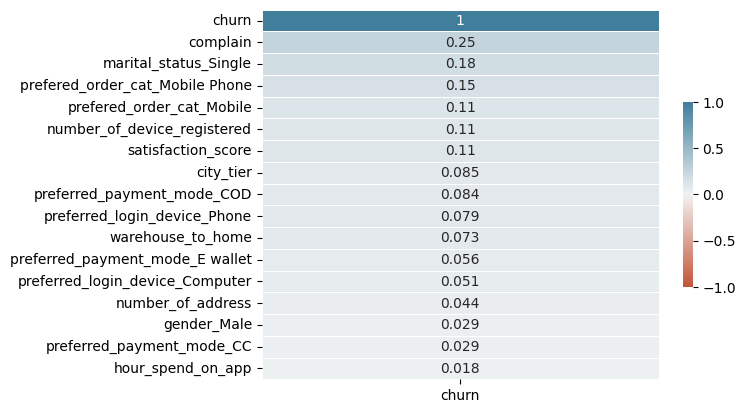

In [78]:
sns.heatmap(
    data=filtered_corr.to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# ESCALABILIDAD DE CAMPOS

In [104]:
scaler = MinMaxScaler()
df_data_preprocessing_scaled = scaler.fit_transform(data_transformed_df)
df_data_preprocessing_scaled = pd.DataFrame(df_data_preprocessing_scaled)
df_data_preprocessing_scaled.columns = data_transformed_df.columns
df_data_preprocessing_scaled

,preferred_login_device_computer,preferred_login_device_mobile_phone,preferred_login_device_phone,preferred_payment_mode_cc,preferred_payment_mode_cod,preferred_payment_mode_cash_on_delivery,preferred_payment_mode_credit_card,preferred_payment_mode_debit_card,preferred_payment_mode_e_wallet,preferred_payment_mode_upi,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.6,0.6,0.00,0.142857,0.0,0.333333,0.1250,0.066667,0.021739,0.492308
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.4,0.4,0.00,0.095238,0.0,0.266667,0.0625,0.000000,0.000000,0.415385
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.8,1.0,0.50,0.428571,0.0,0.466667,0.0625,0.066667,0.152174,0.581538
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.6,0.6,0.00,0.285714,0.0,0.200000,0.1250,0.066667,0.086957,0.492308
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.6,0.6,0.00,0.238095,1.0,0.533333,0.1250,0.066667,0.098772,0.673846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.4,0.4,0.75,0.333333,0.0,0.533333,0.1250,0.200000,0.000000,0.627692
5626,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.6,0.8,0.75,0.095238,0.0,0.333333,0.0625,0.066667,0.021739,0.464615
5627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.6,0.4,1.00,0.047619,0.0,0.733333,0.0000,0.000000,0.173913,0.587692
5628,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.4,0.4,0.50,0.190476,1.0,0.313861,0.0000,0.000000,0.000000,0.901538


# ENTRENANDO MODELO DE REGRESIÓN LOGISTICA

In [105]:
X = df_data_preprocessing_scaled.drop('churn',axis=1)
y = df_data_preprocessing_scaled['churn'].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [108]:
model = LogisticRegression()
result = model.fit(X_train,y_train)

In [110]:
y_pred = model.predict(X_test)
print(f'accuracy : {metrics.accuracy_score(y_test,y_pred)}')

accuracy : 0.8851391355831854


In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(f'accuracy : {metrics.accuracy_score(y_test,y_pred)}')

accuracy : 0.7841930903928065


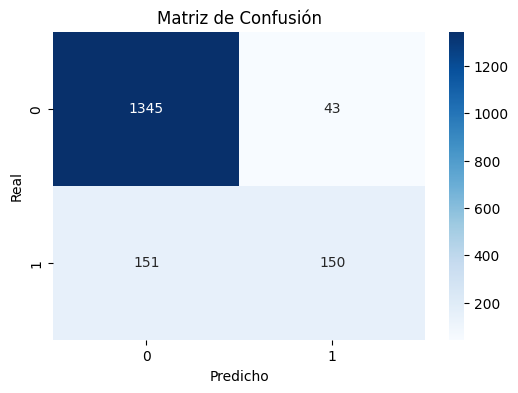

In [111]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()